# 데이터 로드

In [1]:
from datasets import load_dataset

In [2]:
dataset = load_dataset("sciq", split='train')
print(len(dataset))

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


11679


In [3]:
dataset = dataset.filter(lambda x: x['support'] != "")
print(len(dataset))

10481


In [4]:
print(dataset)

Dataset({
    features: ['question', 'distractor3', 'distractor1', 'distractor2', 'correct_answer', 'support'],
    num_rows: 10481
})


In [5]:
dataset[0]

{'question': 'What type of organism is commonly used in preparation of foods such as cheese and yogurt?',
 'distractor3': 'viruses',
 'distractor1': 'protozoa',
 'distractor2': 'gymnosperms',
 'correct_answer': 'mesophilic organisms',
 'support': 'Mesophiles grow best in moderate temperature, typically between 25°C and 40°C (77°F and 104°F). Mesophiles are often found living in or on the bodies of humans or other animals. The optimal growth temperature of many pathogenic mesophiles is 37°C (98°F), the normal human body temperature. Mesophilic organisms have important uses in food preparation, including cheese, yogurt, beer and wine.'}

# ChromaDB 데이터 로드

In [6]:
# !pip install chromadb

In [7]:
import chromadb

In [8]:
client = chromadb.Client()

In [9]:
collection = client.create_collection("sciq_supports")

In [10]:
for idx, text in enumerate(dataset['support'][:14]):
  print(f'{idx} in {text}')

0 in Mesophiles grow best in moderate temperature, typically between 25°C and 40°C (77°F and 104°F). Mesophiles are often found living in or on the bodies of humans or other animals. The optimal growth temperature of many pathogenic mesophiles is 37°C (98°F), the normal human body temperature. Mesophilic organisms have important uses in food preparation, including cheese, yogurt, beer and wine.
1 in Without Coriolis Effect the global winds would blow north to south or south to north. But Coriolis makes them blow northeast to southwest or the reverse in the Northern Hemisphere. The winds blow northwest to southeast or the reverse in the southern hemisphere.
2 in Summary Changes of state are examples of phase changes, or phase transitions. All phase changes are accompanied by changes in the energy of a system. Changes from a more-ordered state to a less-ordered state (such as a liquid to a gas) areendothermic. Changes from a less-ordered state to a more-ordered state (such as a liquid to

In [11]:
# question, correct_answer, support 튜플로 저장
data_pair = list(zip(dataset['question'], dataset['correct_answer'], dataset['support']))
print(
    f'question: {data_pair[0][0]}\n',
    f'answer: {data_pair[0][1]}\n',
    f'support: {data_pair[0][2]}\n'
)

question: What type of organism is commonly used in preparation of foods such as cheese and yogurt?
 answer: mesophilic organisms
 support: Mesophiles grow best in moderate temperature, typically between 25°C and 40°C (77°F and 104°F). Mesophiles are often found living in or on the bodies of humans or other animals. The optimal growth temperature of many pathogenic mesophiles is 37°C (98°F), the normal human body temperature. Mesophilic organisms have important uses in food preparation, including cheese, yogurt, beer and wine.



In [14]:
# collection.add(
#     ids=[str(i) for i in range(len(data_pair))],
#     documents = list(dataset['support']),
#     metadatas = [{'type':'support'} for _ in range(len(data_pair))],
# )

collection.add(
    ids=[str(i) for i in range(0, 100)],
    documents = list(dataset['support'][:100]),
    metadatas = [{'type':'support'} for _ in range(0, 100)],
)

# 컬렉션 질의

In [17]:
results = collection.query(
    query_texts = dataset['question'][:10],
    n_results = 5
  )

In [18]:
type(list)

type

In [19]:
results.keys()

dict_keys(['ids', 'embeddings', 'documents', 'uris', 'included', 'data', 'metadatas', 'distances'])

In [30]:
results['distances'][1][0], results['ids'][1][0]

(0.4666747450828552, '1')

In [24]:
# 거리 기반으로 질의와 가장 밀접한 문서 출력
combined = [(results['distances'][i][0], results['ids'][i][0]) for i in range(10)]

In [25]:
combined

[(1.1048438549041748, '36'),
 (0.4666747450828552, '1'),
 (0.9318015575408936, '2'),
 (0.418067991733551, '3'),
 (1.0375895500183105, '4'),
 (0.5699306130409241, '5'),
 (0.7915273904800415, '6'),
 (0.7859901785850525, '7'),
 (0.6113288402557373, '8'),
 (0.4140006899833679, '9')]

In [36]:
for i, (q, s) in enumerate(zip(dataset['question'][:10], dataset['support'][:10])):
  print(f'question: {q}')
  print(f'support: {s}')
  print(f'Retrieval support: {results['documents'][i][0]}')
  print()

question: What type of organism is commonly used in preparation of foods such as cheese and yogurt?
support: Mesophiles grow best in moderate temperature, typically between 25°C and 40°C (77°F and 104°F). Mesophiles are often found living in or on the bodies of humans or other animals. The optimal growth temperature of many pathogenic mesophiles is 37°C (98°F), the normal human body temperature. Mesophilic organisms have important uses in food preparation, including cheese, yogurt, beer and wine.
Retriverd support: Agents of Decomposition The fungus-like protist saprobes are specialized to absorb nutrients from nonliving organic matter, such as dead organisms or their wastes. For instance, many types of oomycetes grow on dead animals or algae. Saprobic protists have the essential function of returning inorganic nutrients to the soil and water. This process allows for new plant growth, which in turn generates sustenance for other organisms along the food chain. Indeed, without saprobe s

# 멀티모달 검색기

In [1]:
%pip install -Uq chromadb datasets
%pip install uninstall -y thinc spacy
%pip install numpy==1.26.4 datasets --upgrade


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -y


In [3]:
%pip install -Uq open-clip-torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.5 MB/s eta 0:00:00


In [2]:
import numpy as np
np.__version__

'1.26.4'

# 데이터셋 불러오기

In [4]:
import os
from datasets import load_dataset
import matplotlib.pyplot as plt

Resolving data files:   0%|          | 0/40 [00:00<?, ?it/s]

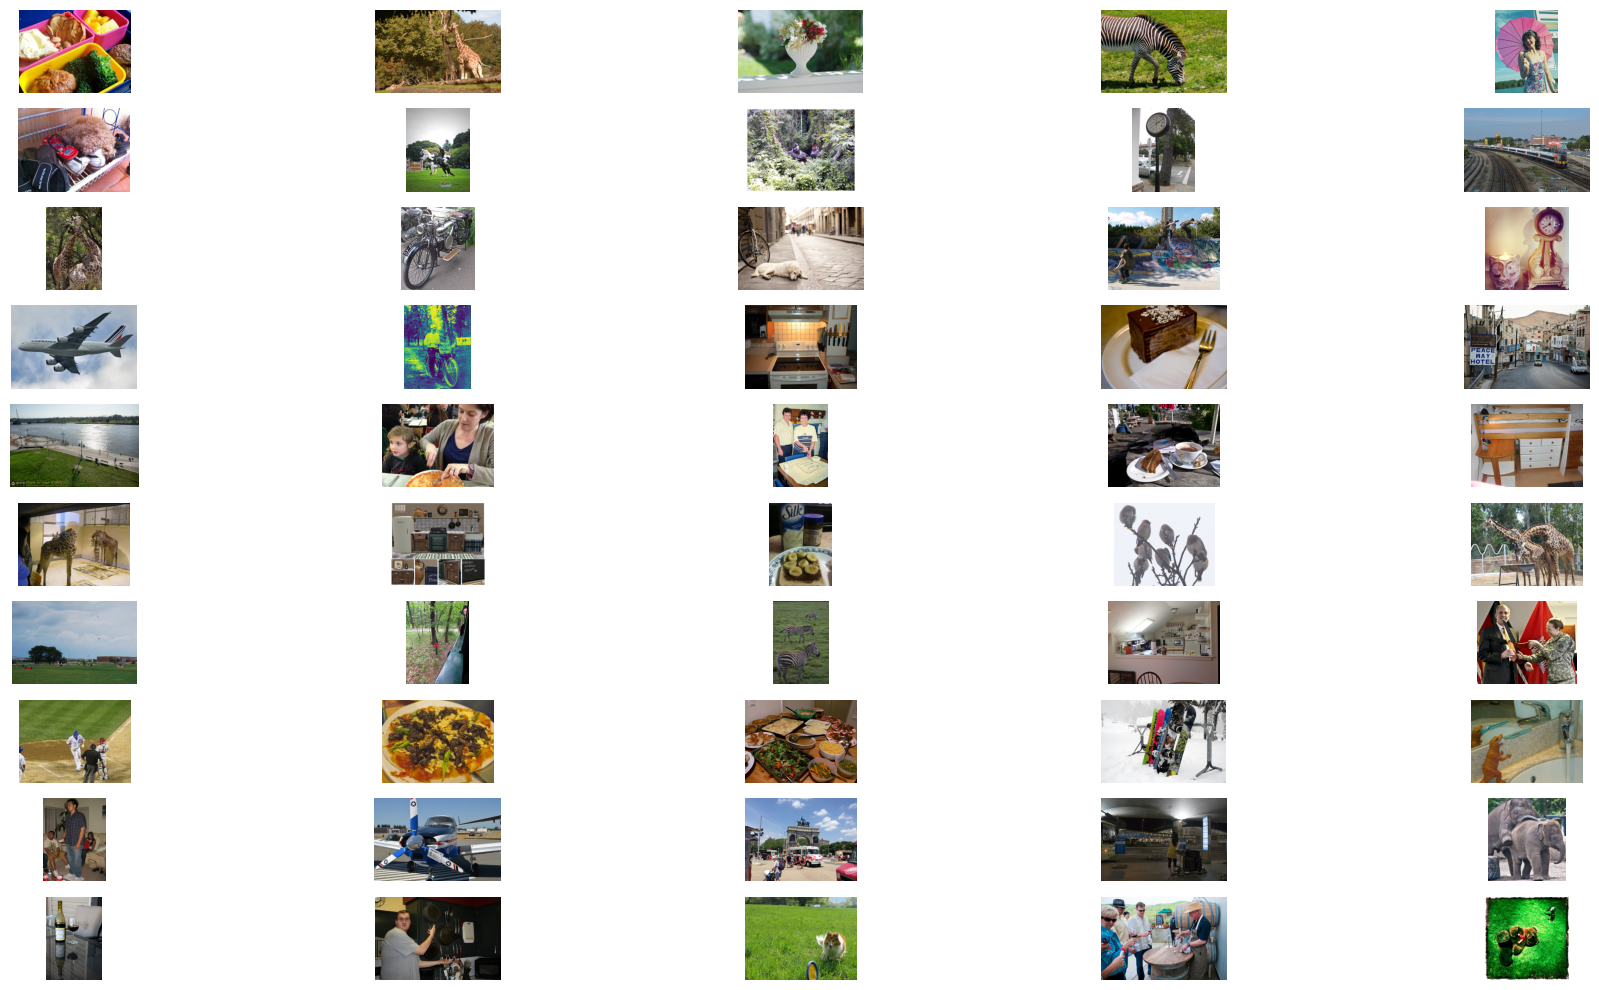

In [15]:
dataset = load_dataset(path='detection-datasets/coco',
                       name='default',
                       split='train',
                       streaming=True)

IMAGE_FOLDER = 'images2'

N_IMAGES = 50
plot_cols = 5
plot_rows = N_IMAGES // plot_cols
fig, axes= plt.subplots(plot_rows, plot_cols, figsize=(plot_rows*2, plot_cols*2))
axes = axes.flatten()

dataset_iter = iter(dataset)
os.makedirs(IMAGE_FOLDER, exist_ok=True)
for i in range(N_IMAGES):
  image = next(dataset_iter)['image']
  axes[i].imshow(image)
  axes[i].axis('off')

  image.save(f'images2/{i}.jpg')

plt.tight_layout()
plt.show()

# 멀티모달 데이터

In [20]:
# 멀티모달 컬렉션 생성
import chromadb

client = chromadb.Client()

In [16]:
from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction
from chromadb.utils.data_loaders import ImageLoader

In [17]:
# 임베딩 함수와 데이터 로더
embedding_function = OpenCLIPEmbeddingFunction()
image_loader = ImageLoader()

open_clip_model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

In [21]:
# 컬렉션 생성
collection = client.create_collection(
    name = 'multimodal_collection2',
    embedding_function = embedding_function,
    data_loader = image_loader
)

In [26]:
# 멀티모달 데이터 추가
image_uris = sorted([os.path.join(IMAGE_FOLDER, image_name) for image_name in os.listdir(IMAGE_FOLDER)])

ids = [str(i) for i in range(len(image_uris))]

collection.add(ids=ids, uris=image_uris)

# 멀티모달 켈렉션 질의하기

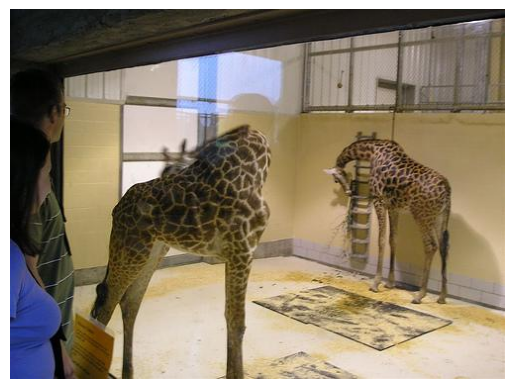

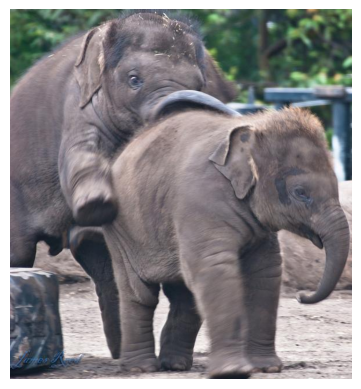

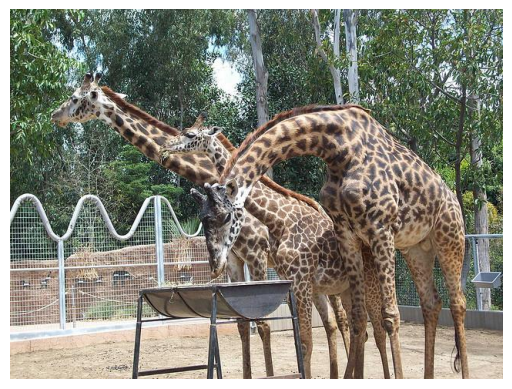

In [27]:
retrieved = collection.query(query_texts=['animals'], include=['data'], n_results=3)
for img in retrieved['data'][0]:
  plt.imshow(img)
  plt.axis('off')
  plt.show()

In [39]:
print(type(retrieved))
print()
print(retrieved.keys())
print()
print(retrieved['data'][0][1])

<class 'dict'>

dict_keys(['ids', 'embeddings', 'documents', 'uris', 'included', 'data', 'metadatas', 'distances'])

[[[109 133 117]
  [111 135 119]
  [115 139 123]
  ...
  [150 187 120]
  [148 184 120]
  [146 182 121]]

 [[102 126 110]
  [105 130 111]
  [108 132 116]
  ...
  [143 179 115]
  [141 177 115]
  [139 175 114]]

 [[ 96 121 102]
  [ 98 123 102]
  [101 126 107]
  ...
  [140 179 116]
  [138 176 115]
  [136 174 115]]

 ...

 [[ 52  45  61]
  [ 50  46  61]
  [ 51  44  60]
  ...
  [211 201 202]
  [209 199 200]
  [206 196 197]]

 [[ 81  72  89]
  [ 81  74  90]
  [ 84  75  92]
  ...
  [198 188 189]
  [197 187 188]
  [195 185 186]]

 [[104  95 112]
  [109 100 117]
  [114 105 122]
  ...
  [212 202 203]
  [211 201 202]
  [207 197 198]]]
